<a href="https://colab.research.google.com/github/mridul-25/Agnext/blob/main/Agnext_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/');

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('drive/MyDrive/DNN/');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset ,DataLoader

In [ ]:
input=pd.read_csv('input.csv',header=None);
labels=pd.read_csv('output_label.csv',header=None);
device=torch.device('cuda:0'if torch.cuda.is_available else 'cpu');
print(device)


cuda:0


In [ ]:
# training a knn classifiefrom sklearn.model_selection import train_test_split
# trying knn algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

y_numpy=np.reshape(labels.to_numpy(),-1);
X_train, X_test, y_train, y_test = train_test_split(
             input.to_numpy(), y_numpy, test_size = 0.2, random_state = 0);
print(y_numpy.shape)

(36963,)


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.985187690226581, 0.9655079128905721]
3 : [0.9840378762259047, 0.9636142296767212]
4 : [0.9763273588096043, 0.9565805491681321]
5 : [0.9744335475143727, 0.9575273907750574]
6 : [0.9691917483936422, 0.9553631813877993]
7 : [0.9676361176868448, 0.9544163397808738]
8 : [0.9629354075076091, 0.9511700256999864]
9 : [0.9616165032127156, 0.9502231840930611]
10 : [0.9575245180926615, 0.9471121330988773]
11 : [0.9559350693270207, 0.9463005545786555]
12 : [0.9530267162664863, 0.94237792506425]
13 : [0.9510314507947244, 0.9414310834573245]
14 : [0.9478863713222861, 0.9381847693764371]
15 : [0.945079472438282, 0.9366968754226972]
16 : [0.9429827527899899, 0.9356147707290681]
17 : [0.9410213053770714, 0.934126876775328]
18 : [0.9380453161988502, 0.9327742459082916]
19 : [0.9364896854920528, 0.9310158257811443]
20 : [0.9339871491376395, 0.9281753009603679]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


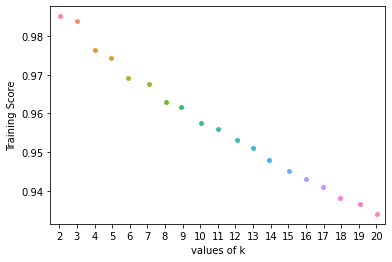

In [ ]:
# plotting the training scores
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score',label='test')  
  
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


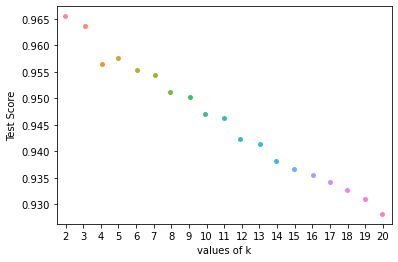

In [ ]:
#plotting the testing scores
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

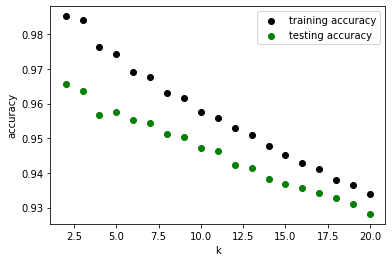

In [ ]:
plt.scatter(K, training, color ='k',label='training accuracy')
plt.scatter(K, test, color ='g',label='testing accuracy')
plt.ylabel('accuracy')
plt.xlabel('k')
plt.legend()
plt.show()

In [ ]:
print(labels.iloc[0:45])
print(input.iloc[0:45])

    0
0  -1
1  -1
2  -1
3  -1
4  -1
5  -1
6  -1
7  -1
8  -1
9  -1
10 -1
11 -1
12 -1
13 -1
14 -1
15 -1
16 -1
17 -1
18 -1
19 -1
20 -1
21 -1
22 -1
23 -1
24 -1
25 -1
26 -1
27 -1
28 -1
29 -1
30 -1
31 -1
32 -1
33 -1
34 -1
35 -1
36 -1
37 -1
38 -1
39 -1
40 -1
41 -1
42 -1
43 -1
44 -1
       0       1       2       3    ...     212     213     214     215
0   2.0463  2.0480  2.0473  2.0462  ...  2.3966  2.3951  2.3941  2.3938
1   1.9631  1.9772  1.9897  1.9965  ...  2.3744  2.3743  2.3742  2.3747
2   1.8763  1.8706  1.8698  1.8738  ...  2.0794  2.0795  2.0799  2.0807
3   1.9823  1.9800  1.9790  1.9805  ...  2.3875  2.3874  2.3889  2.3911
4   2.0052  1.9984  1.9948  1.9943  ...  2.3997  2.4018  2.4021  2.4015
5   2.0232  2.0217  2.0212  2.0203  ...  2.4209  2.4232  2.4294  2.4368
6   1.9350  1.9311  1.9266  1.9254  ...  2.2623  2.2647  2.2650  2.2636
7   1.8679  1.8682  1.8645  1.8617  ...  2.1504  2.1508  2.1524  2.1550
8   1.9252  1.9232  1.9219  1.9221  ...  2.2939  2.2937  2.2949  2.2974
9   

In [ ]:
X=torch.from_numpy(input.to_numpy(dtype=np.float64)).to(device);
Y=torch.from_numpy(labels.to_numpy(dtype=np.int64)).to(device);


Y[Y==-1]=0


In [ ]:
train=TensorDataset(X,Y)
batch=700
training_ds=DataLoader(train,batch_size=batch,shuffle=True);
next(iter(training_ds))

[tensor([[1.9644, 1.9733, 1.9790,  ..., 2.3378, 2.3391, 2.3413],
         [1.9151, 1.9172, 1.9195,  ..., 2.2524, 2.2528, 2.2531],
         [1.9518, 1.9449, 1.9432,  ..., 2.2503, 2.2523, 2.2551],
         ...,
         [1.9184, 1.9159, 1.9151,  ..., 2.1899, 2.1903, 2.1902],
         [1.9544, 1.9543, 1.9546,  ..., 2.2487, 2.2531, 2.2569],
         [1.8997, 1.9021, 1.9076,  ..., 2.3019, 2.3043, 2.3069]],
        device='cuda:0', dtype=torch.float64), tensor([[1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1],
   

In [ ]:
classifier=nn.Sequential(
    nn.Linear(in_features=input.shape[1],out_features=400).double(),
    nn.ReLU(),
    nn.Linear(in_features=400,out_features=100).double(),
    nn.ReLU(),
    nn.Linear(in_features=100,out_features=30).double(),
    nn.ReLU(),
    nn.Linear(in_features=30,out_features=2).double()
)
classifier.to(device)

Sequential(
  (0): Linear(in_features=216, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=30, bias=True)
  (5): ReLU()
  (6): Linear(in_features=30, out_features=2, bias=True)
)

In [ ]:
epochs=2000
losses=[0]*epochs;

In [ ]:
loss_fn=nn.CrossEntropyLoss();
optimizer=optim.Adam(classifier.parameters(),lr=1e-3,weight_decay=1e-5);
print(type(classifier.parameters()))


<class 'generator'>


In [ ]:
def fit(model,optimizer,loss_fn,epochs,data):
  for epoch in range(epochs):
    for x,y in data:
      pred=model(x);
      loss=loss_fn(pred,torch.flatten(y));
      temp=loss.detach().cpu().numpy()
      losses[epoch]=losses[epoch]+temp;
      score,predicted=torch.max(pred,1)
      acc=(y==predicted).sum().float()/y.shape[0]
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
  print('Final training loss',loss);

In [ ]:
fit(classifier,optimizer,loss_fn,epochs,training_ds)

Final training loss tensor(0.4239, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)


In [ ]:
print(type(losses[0]))


<class 'numpy.float64'>


In [ ]:
with torch.no_grad():
  pred=classifier(X);
  score, predicted = torch.max(pred, 1)
  print(predicted.shape)
  acc = ((torch.flatten(Y) == predicted).sum().float()) 
  print(Y.shape)
  print(torch.flatten(Y)==predicted)
  print(acc/(Y.shape[0]))
  

torch.Size([36963])
torch.Size([36963, 1])
tensor([True, True, True,  ..., True, True, True], device='cuda:0')
tensor(0.8391, device='cuda:0')


In [ ]:
print(torch.eq(predicted,Y).shape)

torch.Size([36963, 36963])


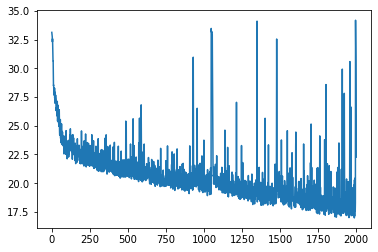

In [ ]:
plt.plot(range(epochs),losses)

In [ ]:
##regression

In [ ]:
output=pd.read_csv('output.csv',header=None)

In [ ]:
input_positive=input.iloc[0:25083,:];
output_positive=output.iloc[0:25083,:];

In [ ]:
variables=input_positive.to_numpy(dtype=np.float64)
print(variables.shape)
targets=output_positive.to_numpy(dtype=np.float64);
print(targets.shape)

(25083, 216)
(25083, 216)


In [ ]:
variables=(torch.from_numpy(variables)).to(device);
targets=(torch.from_numpy(targets)).to(device)


In [ ]:
train=TensorDataset(variables,targets)

In [ ]:
batch_size=1000; #using batch size of 1000
positive_ds=DataLoader(train,batch_size,shuffle=True);
next(iter(positive_ds));

In [ ]:
model=nn.Linear(variables.shape[1],targets.shape[1]).double(); 
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3) 
criterion=nn.functional.mse_loss
model.to(device);

In [ ]:
def fit(num_epochs,model,loss_fn,optimizer,data): #fitting function
  for epoch in range(num_epochs):
    for x,y in data:
      pred=model(x);
      loss=criterion(pred,y);
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
  print('Final training loss',loss);

In [ ]:
fit(100,model,loss_fn,optimizer,positive_ds) #learning rate=1e-3
#final training loss of around 0.009 is achieved

Final training loss tensor(0.0009, device='cuda:0', dtype=torch.float64, grad_fn=<MseLossBackward>)


In [ ]:
preds=model(variables) #predictions
print(preds.shape)
print(preds)

torch.Size([25083, 216])
tensor([[0.7397, 0.7487, 0.7307,  ..., 0.8706, 0.8864, 0.8765],
        [0.7343, 0.7322, 0.7179,  ..., 0.8583, 0.8628, 0.8691],
        [0.6798, 0.6939, 0.6312,  ..., 0.7584, 0.8205, 0.7457],
        ...,
        [0.7171, 0.7264, 0.7377,  ..., 0.8771, 0.8672, 0.8692],
        [0.6892, 0.6945, 0.6969,  ..., 0.8309, 0.8312, 0.8036],
        [0.7197, 0.7314, 0.7356,  ..., 0.8717, 0.8699, 0.8650]],
       device='cuda:0', dtype=torch.float64, grad_fn=<AddmmBackward>)


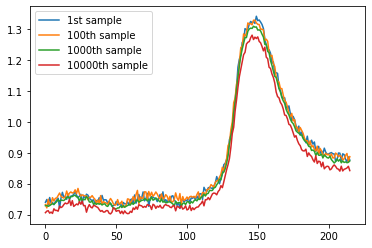

In [ ]:
#plots for the predictions against the sample numbers
plt.plot(range(0,216),preds[0].cpu().detach().numpy()); #for first sample (blue one)
plt.plot(range(0,216),preds[100].cpu().detach().numpy()); #for 90th sample(orange one)
plt.plot(range(0,216),preds[1000].cpu().detach().numpy()); #for 1000th sample(green one)
plt.plot(range(0,216),preds[10000].cpu().detach().numpy()); #for 10000th sample(red one)
plt.legend(['1st sample','100th sample','1000th sample','10000th sample']);

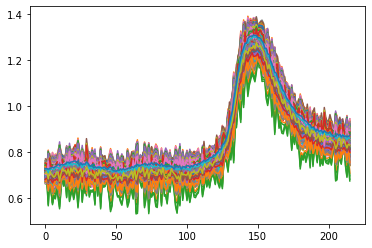

In [ ]:
#plot of first thousand samples
for i in range(0,1001):
  plt.plot(range(0,216),preds[i].cpu().detach().numpy());
plt.show()


In [ ]:
# now the model for negative values
input_negative=input.iloc[25083:input.shape[0]];
output_negative=output.iloc[25083:input.shape[0]];


In [ ]:
#data of negative values
var=input_negative.to_numpy(dtype=np.float64);
target_neg=output_negative.to_numpy(dtype=np.float64);
print(var.shape)


(11880, 216)


In [ ]:
#training dataset for negative values
var=torch.from_numpy(var).to(device);
target_neg=torch.from_numpy(target_neg).to(device);
train_2=TensorDataset(var,target_neg)



In [ ]:
#batch size for negative y-values
batch_size=700;
train_ds_2=DataLoader(train_2,batch_size,shuffle=True)
next(iter(train_ds_2))

[tensor([[1.9788, 1.9753, 1.9748,  ..., 2.3327, 2.3384, 2.3438],
         [1.9463, 1.9467, 1.9475,  ..., 2.3085, 2.3130, 2.3160],
         [1.9555, 1.9668, 1.9703,  ..., 2.3105, 2.3139, 2.3169],
         ...,
         [2.0176, 2.0187, 2.0200,  ..., 2.3996, 2.4039, 2.4064],
         [2.0238, 2.0157, 2.0080,  ..., 2.3743, 2.3747, 2.3752],
         [1.9527, 1.9489, 1.9477,  ..., 2.3031, 2.3042, 2.3043]],
        device='cuda:0', dtype=torch.float64),
 tensor([[-0.7155, -0.7151, -0.7131,  ..., -0.8488, -0.8460, -0.8433],
         [-0.7232, -0.7210, -0.7196,  ..., -0.8549, -0.8523, -0.8509],
         [-0.7238, -0.7102, -0.7056,  ..., -0.8611, -0.8599, -0.8589],
         ...,
         [-0.7222, -0.7169, -0.7129,  ..., -0.8630, -0.8620, -0.8626],
         [-0.7059, -0.7104, -0.7159,  ..., -0.8672, -0.8697, -0.8719],
         [-0.7123, -0.7144, -0.7150,  ..., -0.8544, -0.8552, -0.8569]],
        device='cuda:0', dtype=torch.float64)]

In [ ]:
#suspecting a reflection of plot about x-axis, initialising the model for negative
#values with the negative of weights and biases of the model for the positive values
import copy
model_neg=nn.Linear(input.shape[1],output.shape[1]).double();
print(model_neg.weight)
print(model_neg.weight.shape)
with torch.no_grad():
  model_neg.weight.copy_(torch.mul(model.weight,-1));
  model_neg.bias.copy_(torch.mul(model.bias,-1));

print(model_neg.weight)
model_neg.to(device)

Parameter containing:
tensor([[-0.0040, -0.0266, -0.0161,  ..., -0.0527,  0.0184,  0.0078],
        [ 0.0380,  0.0350,  0.0603,  ..., -0.0309,  0.0396,  0.0586],
        [ 0.0425,  0.0677,  0.0435,  ..., -0.0590,  0.0596,  0.0402],
        ...,
        [ 0.0285,  0.0078,  0.0072,  ...,  0.0312, -0.0434,  0.0102],
        [ 0.0631,  0.0252,  0.0072,  ..., -0.0036, -0.0234, -0.0429],
        [-0.0324, -0.0249, -0.0531,  ...,  0.0374,  0.0545, -0.0007]],
       dtype=torch.float64, requires_grad=True)
torch.Size([216, 216])
Parameter containing:
tensor([[ 0.0443, -0.0346,  0.0152,  ..., -0.0413,  0.0172, -0.0691],
        [ 0.0502,  0.0064, -0.0601,  ...,  0.0367,  0.0440, -0.0122],
        [ 0.0181, -0.0402, -0.0643,  ...,  0.0037,  0.0507,  0.0235],
        ...,
        [ 0.0593, -0.0417,  0.0322,  ...,  0.0395, -0.0402,  0.0305],
        [-0.0353, -0.0332,  0.0088,  ...,  0.0382,  0.0585, -0.0077],
        [ 0.0508,  0.0086,  0.0079,  ...,  0.0376,  0.0014, -0.0514]],
       dtype=torc

Linear(in_features=216, out_features=216, bias=True)

In [ ]:
fit(100,model_neg,loss_fn,optimizer,train_ds_2);
#fitting the model for below-x axis values. Achieved a loss of around 0.037

Final training loss tensor(0.0278, device='cuda:0', dtype=torch.float64, grad_fn=<MseLossBackward>)


In [ ]:
preds_2=model_neg(var)
print(preds_2.shape)

torch.Size([11880, 216])


In [ ]:
preds_2=model_neg(var)
print(preds_2.shape)

torch.Size([11880, 216])


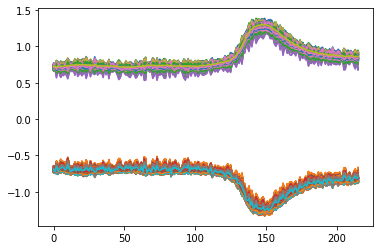

In [ ]:
#plots combined
for i in range(0,1000):
  plt.plot(range(0,216),preds[i].cpu().detach().numpy())
  plt.plot(range(0,216),preds_2[i].cpu().detach().numpy())


In [ ]:
os.chdir('../../../MyDrive/')
print(os.getcwd())

/content/drive/MyDrive


In [ ]:
valid=pd.read_csv('validation_data_1.csv',header=None)

In [ ]:
test_x=torch.from_numpy(valid.to_numpy(dtype=np.float64)).to(device)
positive=model(test_x)
negative=model_neg(test_x)
print(positive)

tensor([[0.7169, 0.7187, 0.7300,  ..., 0.8719, 0.8735, 0.8633],
        [0.7158, 0.7195, 0.7293,  ..., 0.8711, 0.8744, 0.8632],
        [0.7199, 0.7203, 0.7360,  ..., 0.8805, 0.8753, 0.8742],
        ...,
        [0.7499, 0.7268, 0.8041,  ..., 0.9629, 0.9169, 0.9492],
        [0.7303, 0.7176, 0.7684,  ..., 0.9209, 0.8919, 0.9063],
        [0.7369, 0.7241, 0.7698,  ..., 0.9236, 0.8958, 0.9146]],
       device='cuda:0', dtype=torch.float64, grad_fn=<AddmmBackward>)


In [ ]:
with torch.no_grad():
  pred_v=classifier(test_x);
  score_v, predicted_v = torch.max(pred_v, 1)
  print(predicted_v.shape)
 
  

torch.Size([66])


In [ ]:
with torch.no_grad():
  valid_predictions=pd.DataFrame(data=np.zeros(test_x.shape))
  for i in range(test_x.shape[0]):
    if predicted_v[i] is 0:
      valid_predictions.iloc[i]=positive[i].cpu().detach().numpy()
    else:
      valid_predictions.iloc[i]=negative[i].cpu().detach().numpy()
    

In [ ]:
print(predicted_v)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [ ]:
clf=KNeighborsClassifier(n_neighbors = 2);
clf.fit(X_train,y_train);
classified=clf.predict(input)


In [ ]:
output_predicted=torch.zeros(output.shape).to(device)
for i in range (classified.shape[0]):
  if classified[i]== -1:
    output_predicted[i]=model(X[i]);
    print(i)
  else:
    output_predicted[i]=model_neg(X[i]);

Streaming output truncated to the last 5000 lines.
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
2

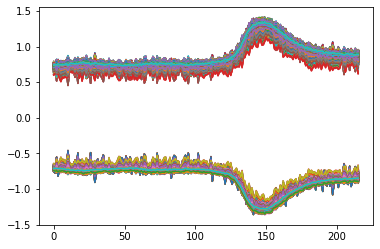

In [ ]:
for i in range(0,35000):
  plt.plot(range(0,216),output_predicted[i].cpu().detach().numpy()) 

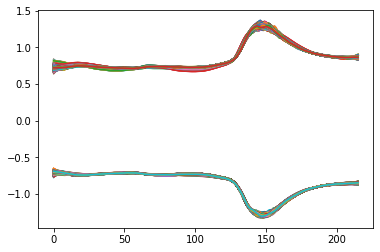

In [ ]:
for i in range(0,35000):
  plt.plot(range(0,216),output.iloc[i]) 

In [ ]:
print(output_predicted[36000])
print (X[0])

tensor([-0.6874, -0.7004, -0.6298, -0.6996, -0.6723, -0.6510, -0.6507, -0.6571,
        -0.6772, -0.6638, -0.6077, -0.6685, -0.7053, -0.6866, -0.6895, -0.6520,
        -0.7020, -0.6432, -0.6879, -0.6702, -0.6892, -0.6771, -0.6806, -0.6460,
        -0.6731, -0.6984, -0.6387, -0.6889, -0.6729, -0.7020, -0.7031, -0.6566,
        -0.6742, -0.6554, -0.6612, -0.6345, -0.7029, -0.6595, -0.7085, -0.6421,
        -0.6996, -0.6871, -0.6962, -0.6791, -0.6836, -0.6658, -0.6390, -0.6375,
        -0.6518, -0.6699, -0.6767, -0.6259, -0.6538, -0.6558, -0.6272, -0.6869,
        -0.6661, -0.6694, -0.6334, -0.6486, -0.6748, -0.6856, -0.6397, -0.7096,
        -0.6138, -0.6324, -0.7291, -0.6776, -0.6838, -0.7102, -0.6317, -0.6524,
        -0.7042, -0.6183, -0.6776, -0.6776, -0.6716, -0.6570, -0.6531, -0.6479,
        -0.6919, -0.6950, -0.6518, -0.7259, -0.6552, -0.6378, -0.6381, -0.6726,
        -0.6537, -0.7082, -0.6873, -0.6688, -0.6408, -0.6298, -0.6594, -0.6086,
        -0.6985, -0.6503, -0.6713, -0.66

In [ ]:
print(classified.shape)
print(model(X[0]))

(36963,)
tensor([0.7397, 0.7487, 0.7307, 0.7551, 0.7374, 0.7390, 0.7317, 0.7409, 0.7469,
        0.7528, 0.7209, 0.7528, 0.7719, 0.7556, 0.7596, 0.7494, 0.7665, 0.7490,
        0.7598, 0.7603, 0.7655, 0.7745, 0.7628, 0.7536, 0.7592, 0.7656, 0.7349,
        0.7618, 0.7543, 0.7658, 0.7627, 0.7537, 0.7479, 0.7458, 0.7476, 0.7343,
        0.7454, 0.7418, 0.7544, 0.7411, 0.7618, 0.7462, 0.7481, 0.7472, 0.7377,
        0.7416, 0.7351, 0.7265, 0.7294, 0.7304, 0.7421, 0.7306, 0.7330, 0.7376,
        0.7226, 0.7391, 0.7346, 0.7344, 0.7411, 0.7308, 0.7477, 0.7502, 0.7341,
        0.7634, 0.7366, 0.7504, 0.7650, 0.7471, 0.7533, 0.7732, 0.7442, 0.7506,
        0.7687, 0.7263, 0.7527, 0.7582, 0.7560, 0.7531, 0.7511, 0.7418, 0.7531,
        0.7649, 0.7467, 0.7734, 0.7406, 0.7483, 0.7393, 0.7491, 0.7425, 0.7588,
        0.7609, 0.7473, 0.7413, 0.7297, 0.7389, 0.7196, 0.7483, 0.7469, 0.7410,
        0.7464, 0.7453, 0.7523, 0.7403, 0.7539, 0.7527, 0.7575, 0.7478, 0.7601,
        0.7508, 0.7672, 0.7674,

In [ ]:
print(classified[0])

-1


In [ ]:
print(clf.predict(valid)) 
# labels for validation dataset


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
